In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/Dataset/traffic_sign_classification_dataset'
train_dir = f'{data_dir}/train'
test_dir = f'{data_dir}/test'


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

# Image parameters
img_height, img_width = 224, 224
batch_size = 32

# Data Augmentation
train_gen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=15
)

test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 4438 images belonging to 85 classes.
Found 1288 images belonging to 85 classes.


In [ ]:
num_classes = len(train_data.class_indices)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,607,765 (9.95 MB)

 Trainable params: 349,781 (1.33 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
checkpoint_path = "/content/traffic_sign_model.h5"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max')

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=15,
    callbacks=[checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.3514 - loss: 2.7859

139/139 ━━━━━━━━━━━━━━━━━━━━ 1666s 12s/step - accuracy: 0.3524 - loss: 2.7808 - val_accuracy: 0.5474 - val_loss: 1.6510
Epoch 2/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6572 - loss: 1.1548

139/139 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - accuracy: 0.6573 - loss: 1.1543 - val_accuracy: 0.6483 - val_loss: 1.3287
Epoch 3/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7274 - loss: 0.8672

139/139 ━━━━━━━━━━━━━━━━━━━━ 346s 2s/step - accuracy: 0.7275 - loss: 0.8669 - val_accuracy: 0.6630 - val_loss: 1.1986
Epoch 4/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7984 - loss: 0.6502

139/139 ━━━━━━━━━━━━━━━━━━━━ 399s 3s/step - accuracy: 0.7984 - loss: 0.6502 - val_accuracy: 0.7026 - val_loss: 1.0473
Epoch 5/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8156 - loss: 0.5708

139/139 ━━━━━━━━━━━━━━━━━━━━ 354s 3s/step - accuracy: 0.8156 - loss: 0.5707 - val_accuracy: 0.7089 - val_loss: 1.0684
Epoch 6/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8390 - loss: 0.4893

139/139 ━━━━━━━━━━━━━━━━━━━━ 362s 3s/step - accuracy: 0.8390 - loss: 0.4894 - val_accuracy: 0.7213 - val_loss: 1.0273
Epoch 7/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8592 - loss: 0.4288

139/139 ━━━━━━━━━━━━━━━━━━━━ 354s 3s/step - accuracy: 0.8592 - loss: 0.4288 - val_accuracy: 0.7259 - val_loss: 1.0237
Epoch 8/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8700 - loss: 0.3848

139/139 ━━━━━━━━━━━━━━━━━━━━ 369s 3s/step - accuracy: 0.8700 - loss: 0.3849 - val_accuracy: 0.7391 - val_loss: 1.0009
Epoch 9/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8793 - loss: 0.3567

139/139 ━━━━━━━━━━━━━━━━━━━━ 360s 3s/step - accuracy: 0.8793 - loss: 0.3567 - val_accuracy: 0.7461 - val_loss: 0.9480
Epoch 10/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 371s 3s/step - accuracy: 0.8921 - loss: 0.3237 - val_accuracy: 0.7306 - val_loss: 0.8995
Epoch 11/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 368s 2s/step - accuracy: 0.8875 - loss: 0.3219 - val_accuracy: 0.7407 - val_loss: 0.9324
Epoch 12/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9091 - loss: 0.2687

139/139 ━━━━━━━━━━━━━━━━━━━━ 343s 2s/step - accuracy: 0.9091 - loss: 0.2688 - val_accuracy: 0.7508 - val_loss: 0.9410
Epoch 13/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8960 - loss: 0.2817

139/139 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.8960 - loss: 0.2818 - val_accuracy: 0.7547 - val_loss: 0.9534
Epoch 14/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.9143 - loss: 0.2428 - val_accuracy: 0.7508 - val_loss: 0.9615
Epoch 15/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9068 - loss: 0.2717

139/139 ━━━━━━━━━━━━━━━━━━━━ 372s 3s/step - accuracy: 0.9068 - loss: 0.2717 - val_accuracy: 0.7570 - val_loss: 0.9130


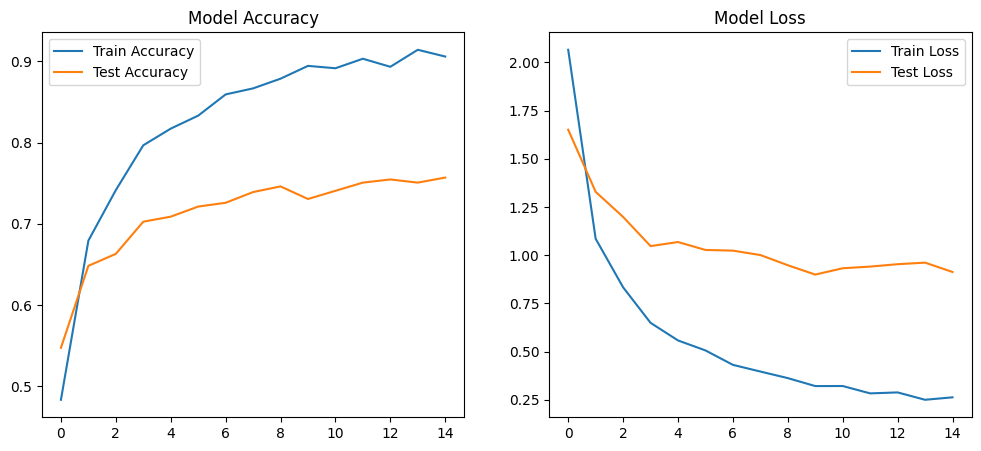

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


41/41 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step


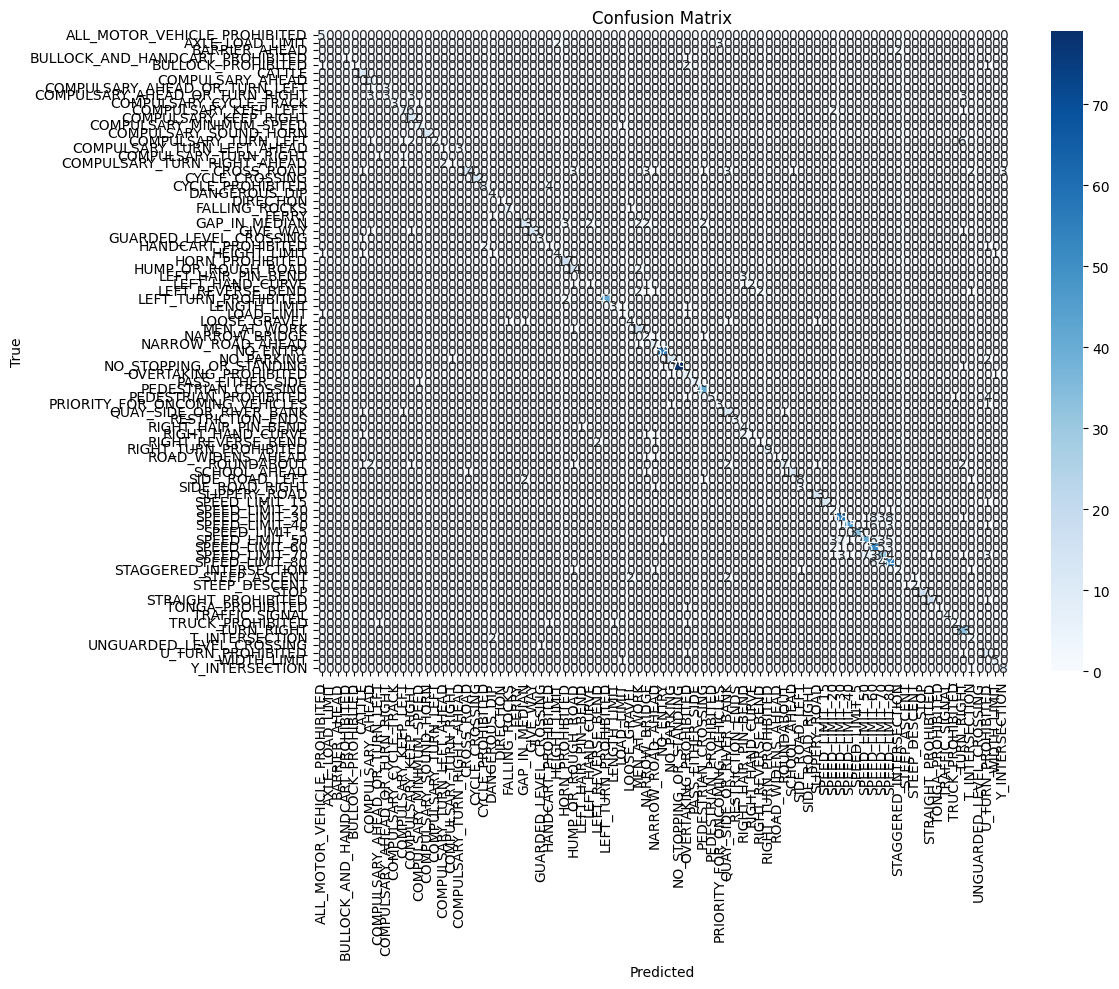

Classification Report:
                                 precision    recall  f1-score   support

   ALL_MOTOR_VEHICLE_PROHIBITED       0.62      1.00      0.77         5
                AXLE_LOAD_LIMIT       0.00      0.00      0.00         5
                  BARRIER_AHEAD       0.00      0.00      0.00         2
BULLOCK_AND_HANDCART_PROHIBITED       1.00      0.50      0.67         2
             BULLOCK_PROHIBITED       1.00      0.20      0.33         5
                         CATTLE       0.65      1.00      0.79        11
               COMPULSARY_AHEAD       0.56      1.00      0.71        10
  COMPULSARY_AHEAD_OR_TURN_LEFT       0.00      0.00      0.00         4
 COMPULSARY_AHEAD_OR_TURN_RIGHT       0.50      0.25      0.33        12
         COMPULSARY_CYCLE_TRACK       1.00      0.75      0.86         4
           COMPULSARY_KEEP_LEFT       0.64      0.44      0.52        16
          COMPULSARY_KEEP_RIGHT       0.48      1.00      0.65        12
       COMPULSARY_MINIMUM_S

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Reload best model
model.load_weights(checkpoint_path)

# Predict classes
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data.classes
class_names = list(test_data.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


In [ ]:
model.save("/content/drive/MyDrive/traffic_sign_classifier_final.h5")
